# Projeto Ligação 911

Projeto de conclusão de fase do curso 'Python para Data Science e Machine Learning'.
Ministrado pelo professor Rodrigo Soares Tadewald.

In [26]:
import numpy as np
import pandas as pd

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
df = pd.read_csv('dataset/911.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# Descrição 

* lat: Latitude
* lng: Longitude
* desc: Descrição da Chamada de Emergência
* zip: CEP
* title: Título
* timeStamp: Hora (AAAA-MM-DD HH: MM: SS)
* twp: Cidade
* addr: Endereço
* e: Variável Dummy (sempre 1)


In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Perguntas básicas

* Quais os tops 5 CEPs da chamada 911?

In [10]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

* Quais são os 5 principais municípios nas chamadas 911?

In [11]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

* Quantos códigos de título exclusivos existem na coluna 'title'?

In [12]:
df['title'].nunique()

148

# Criando novos recursos

* Na coluna "title" existem "Razões / Departamentos", vamos fazer a contagem de cada um.

In [44]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [45]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

* Countplot baseada nessa noda coluna

<AxesSubplot:xlabel='Reason', ylabel='count'>

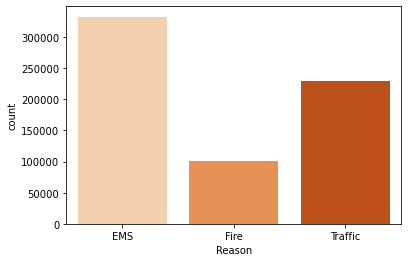

In [15]:
sns.countplot(x='Reason',data=df, palette='Oranges')

* Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? 

In [16]:
type(df['timeStamp'].iloc[0])

str

* Precisamos converter essa coluna de 'str' para 'DateTime'

In [37]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [38]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

* Agora vamos crias três novas colunas chamadas de 'Hour , Month e Day of Week'. 

In [39]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

* Tranformando os números obtidos na função 'dayofweek' em str.

In [40]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [41]:
df['Day of Week'] = df['Day of Week'].map(dmap)

* Verificando...

In [42]:
df['Day of Week'].value_counts()

Fri    102942
Wed     99157
Thu     98683
Tue     97684
Mon     96745
Sat     89452
Sun     78859
Name: Day of Week, dtype: int64

* Gráfico 'Countplot' da coluna Day of Week em relação a coluna 'Reason'

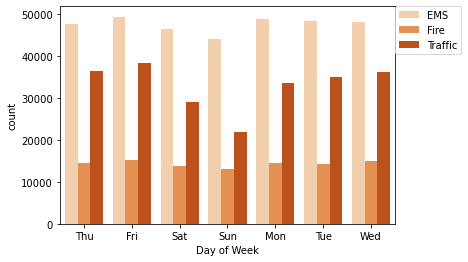

In [93]:
sns.countplot(x='Day of Week', data=df, palette='Oranges', hue='Reason')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0)

* Mesmo gráfico para a coluna 'Month'

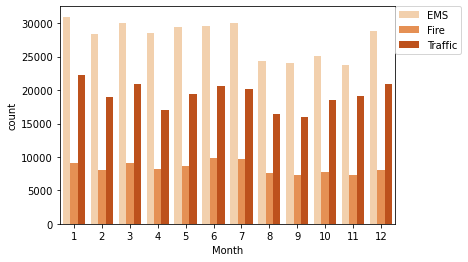

In [94]:
sns.countplot(x='Month', data=df, palette='Oranges', hue='Reason')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0)

* Contagem de chamadas por mês

In [10]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

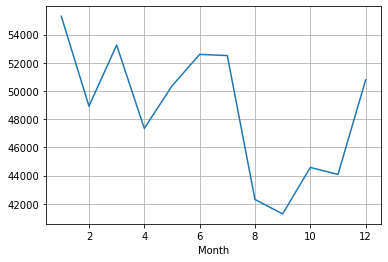

In [31]:
byMonth['zip'].plot(grid=True)

* Modelo linear do número de chamadas por mês.

In [24]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


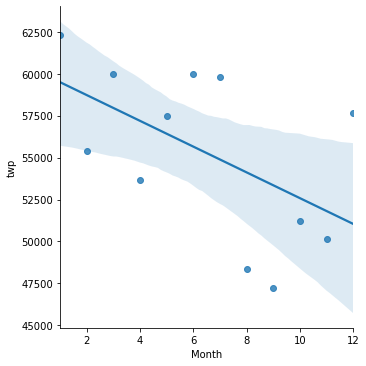

In [38]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

* Criando uma nova coluna chamda 'Date' para verificar as chamadas feitas ao decorrer dos anos.

In [11]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [15]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


* Gráfico que mostra as chamadas em decorrer do anos.

<AxesSubplot:xlabel='Date'>

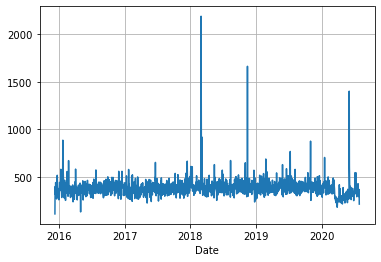

In [14]:
df.groupby('Date').count()['twp'].plot(grid=True)

* Gráfico diferentes repesentando uma 'Reason'.

Text(0.5, 1.0, 'Traffic')

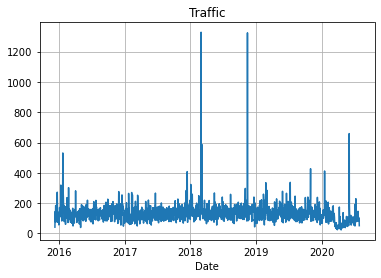

In [19]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(grid=True)
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

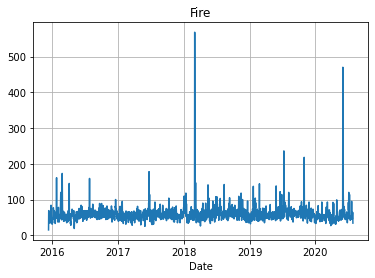

In [20]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(grid=True)
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

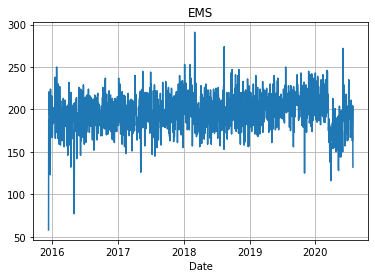

In [21]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(grid=True)
plt.title('EMS')

# Mapa de Calor 

* Vamos reestruturar os dados da coluna. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. 

In [46]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

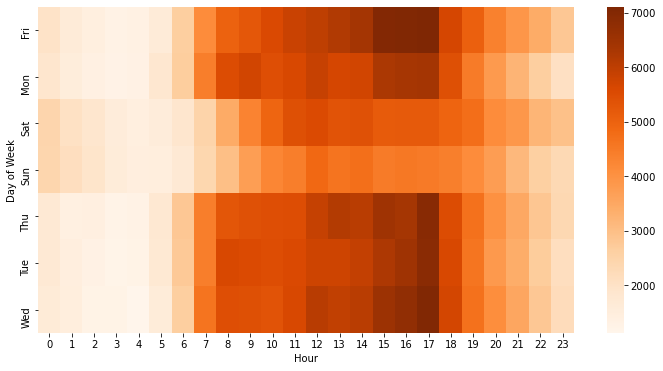

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='Oranges')

# Clustermap

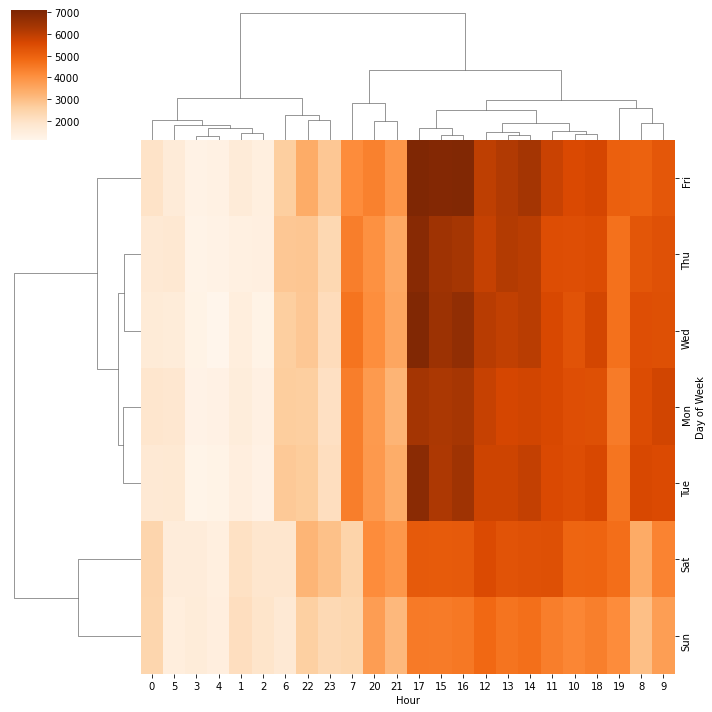

In [53]:
sns.clustermap(dayHour, cmap='Oranges')